In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv('D:\PYTHON\python2\Iris.csv')

In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

<AxesSubplot:ylabel='SepalLengthCm'>

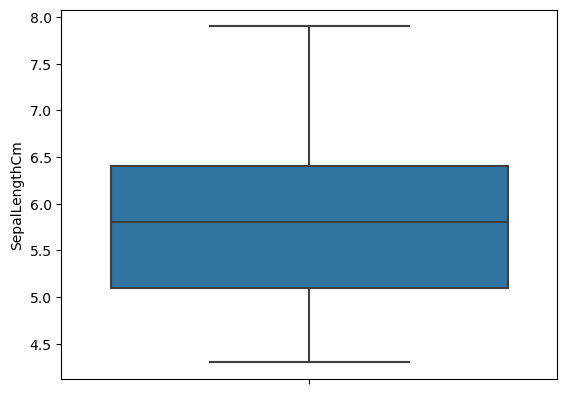

In [9]:
sns.boxplot(y=data['SepalLengthCm'])

<AxesSubplot:ylabel='SepalWidthCm'>

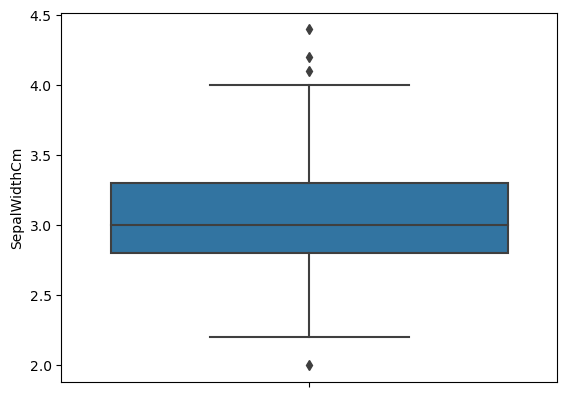

In [10]:
sns.boxplot(y=data['SepalWidthCm'])

<AxesSubplot:ylabel='PetalLengthCm'>

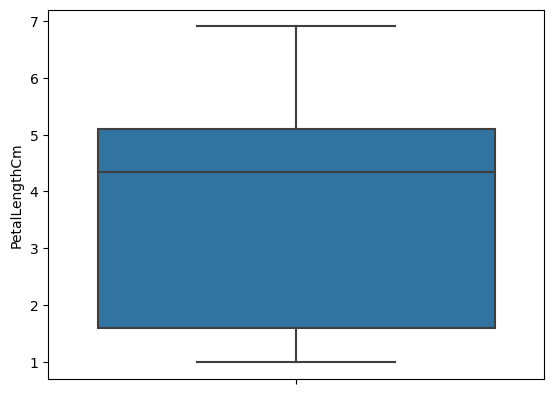

In [11]:
sns.boxplot(y=data['PetalLengthCm'])


<AxesSubplot:ylabel='PetalWidthCm'>

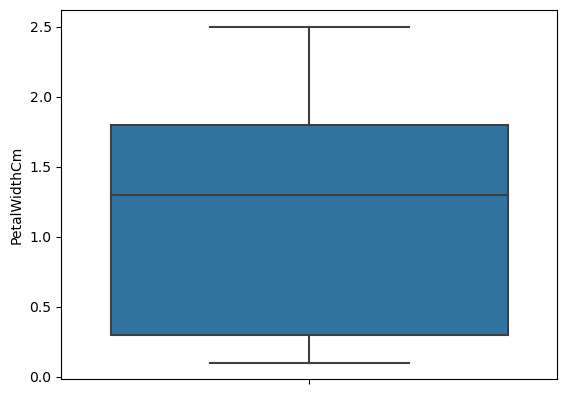

In [12]:
sns.boxplot(y=data['PetalWidthCm'])

In [13]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

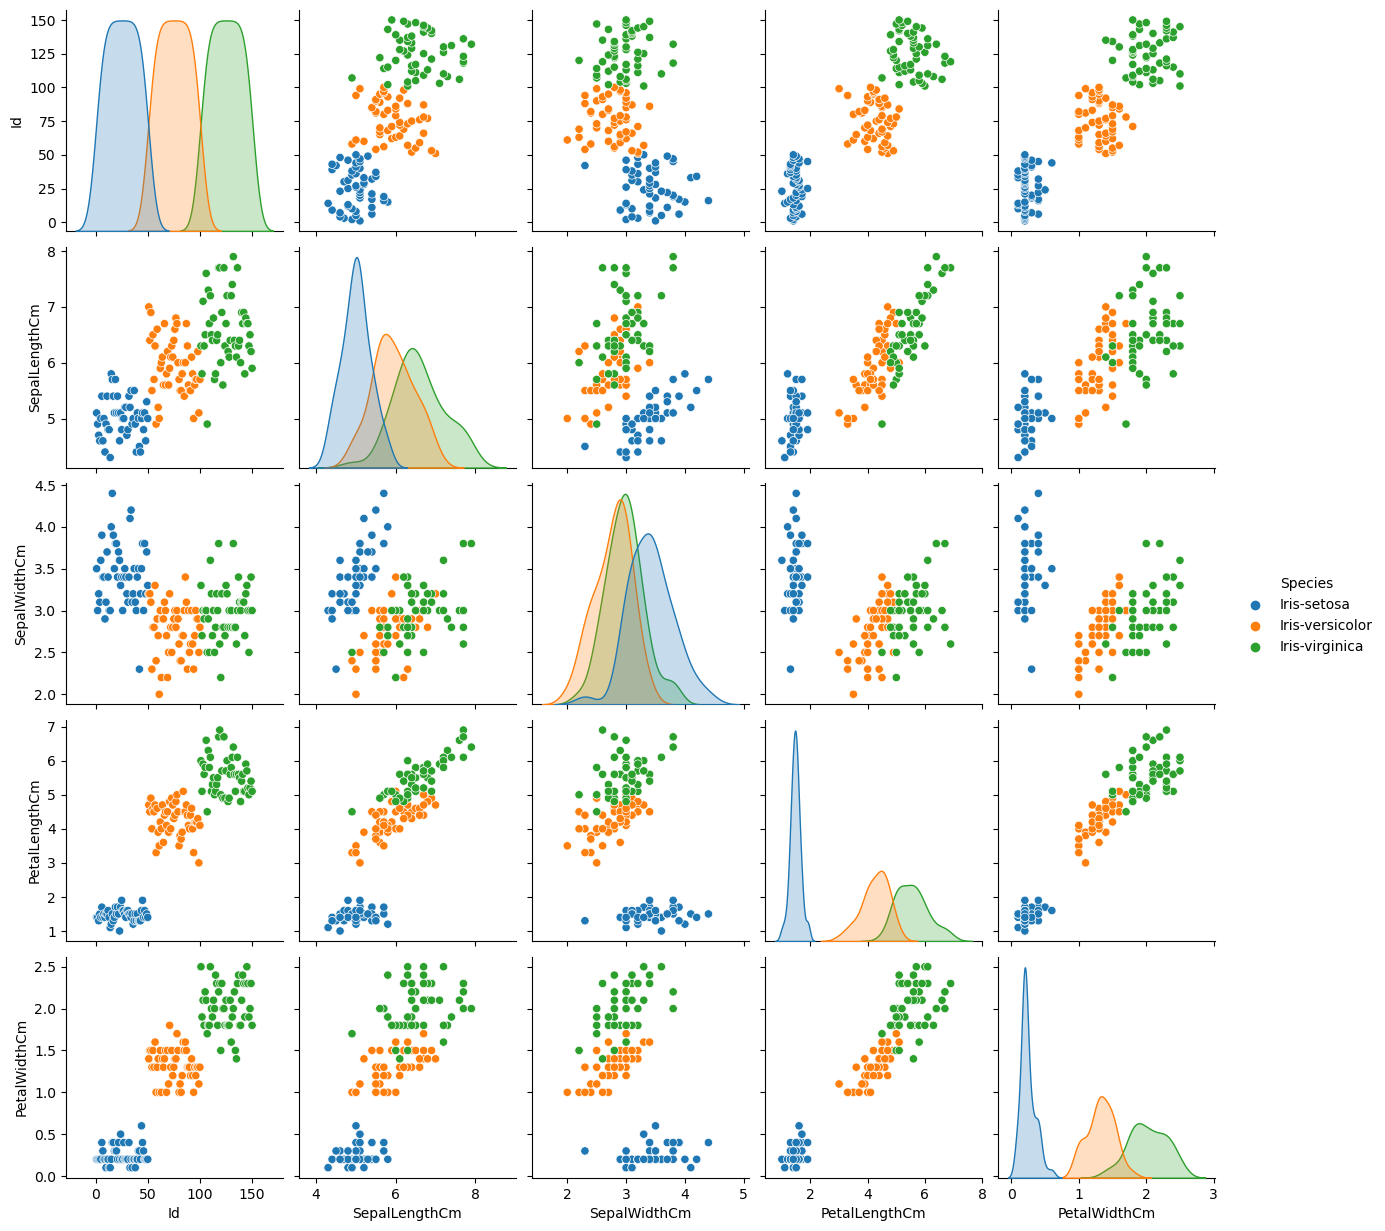

In [14]:
sns.pairplot(data, hue='Species')

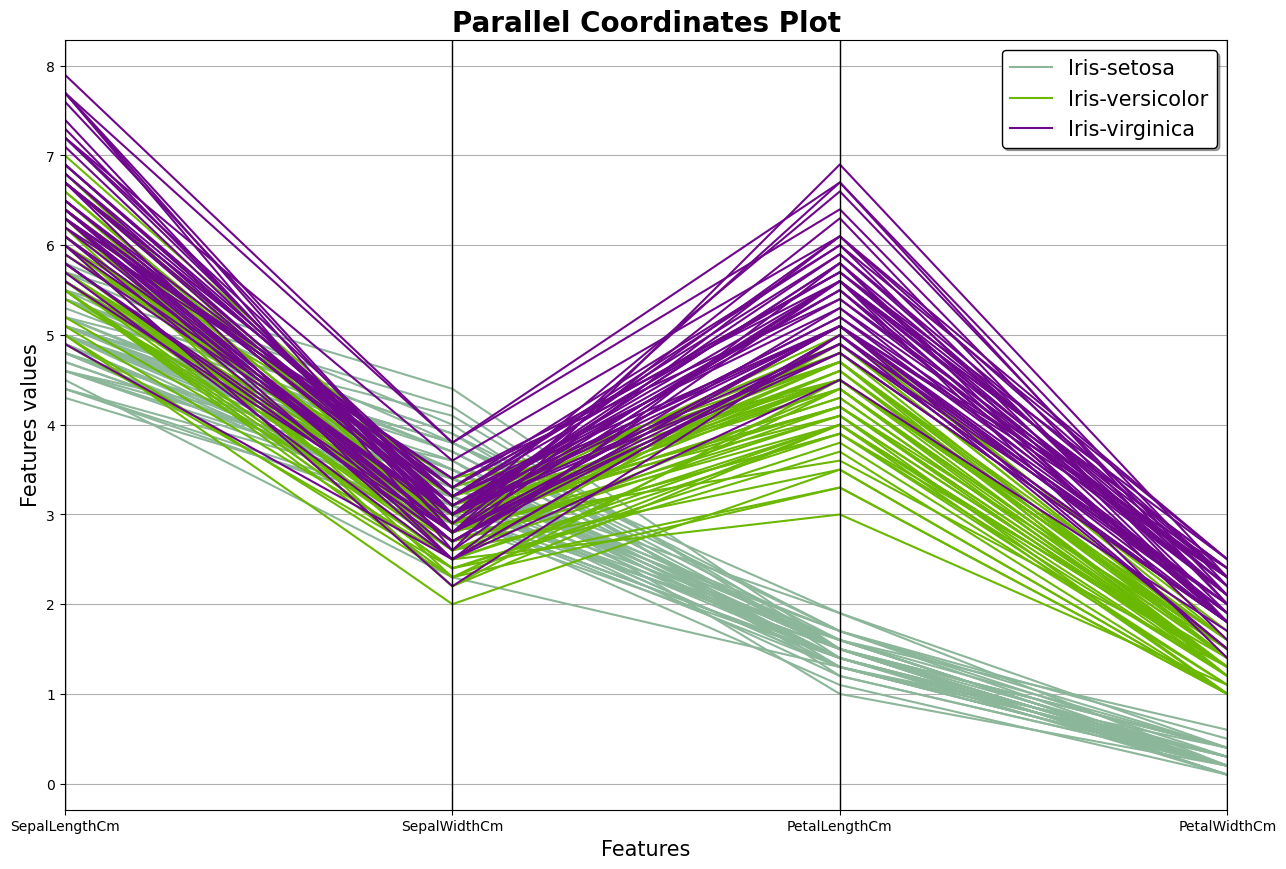

In [15]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(data.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15},frameon=True,shadow=True,facecolor="white", edgecolor="black")
plt.show()

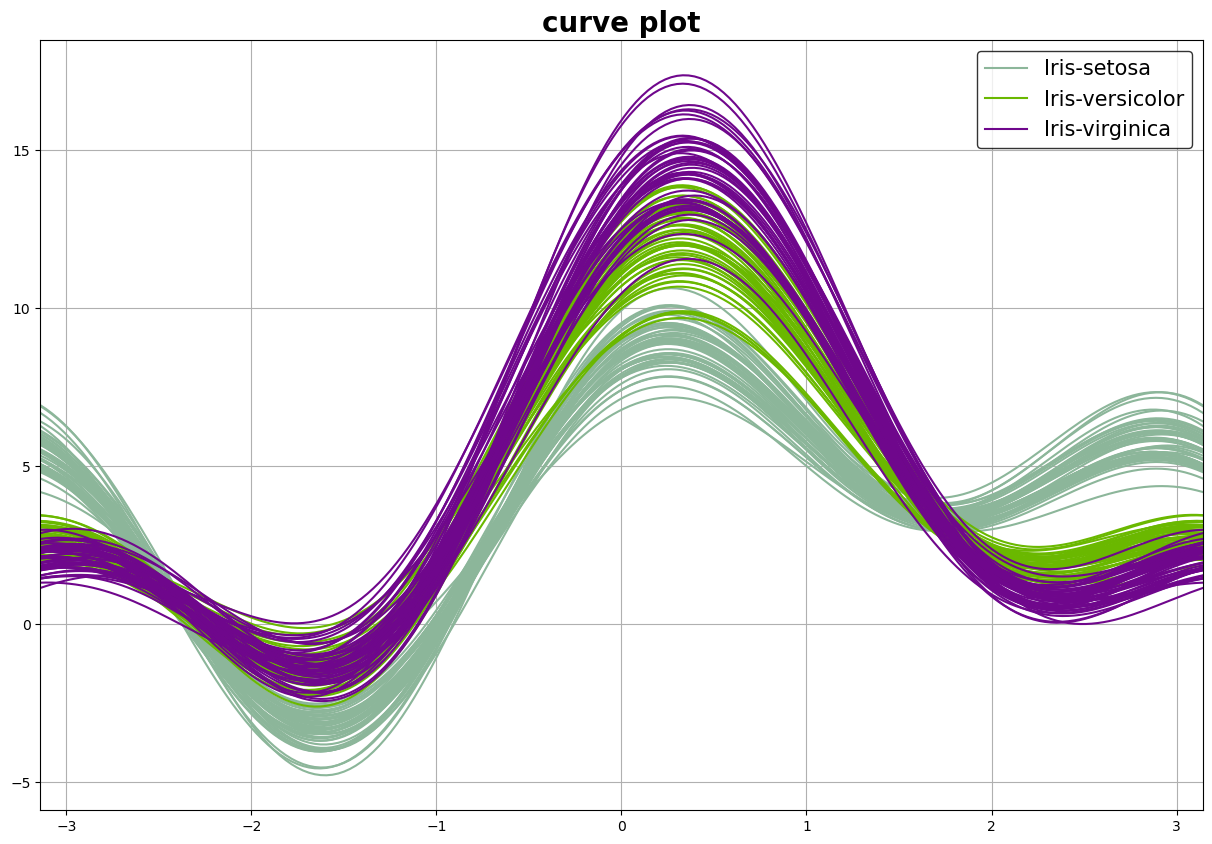

In [16]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(data.drop("Id",axis=1),"Species")
plt.title('curve plot',fontsize=20,fontweight='bold')
plt.legend(loc=1, prop={'size':15}, frameon=True, facecolor="white", edgecolor="black")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
features = data.drop('Species', axis=1)
target = data['Species']

In [18]:
scale = StandardScaler()

In [19]:
scale.fit(features)

StandardScaler()

In [20]:
scaled_features=scale.transform(features)

In [21]:
data_new = pd.DataFrame(scaled_features)
data_new.head(3)

,0,1,2,3,4
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977


In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_new, target, test_size=0.25, random_state=45)

In [31]:
x_train.shape

(112, 5)

In [32]:
x_train.head()

,0,1,2,3,4
74,-0.011547,0.674501,-0.356361,0.307833,0.133226
30,-1.027706,-1.264185,0.106445,-1.227541,-1.312977
33,-0.958423,-0.416010,2.651878,-1.341272,-1.312977
82,0.173209,-0.052506,-0.819166,0.080370,0.001753
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977


In [33]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
pred = model.predict(x_test)
pred

C:\Users\s.m.chishty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [35]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [36]:
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

100.0 %


C:\Users\s.m.chishty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
